In [1]:
import sys

In [2]:
sys.path

['/Users/oda/Dropbox/1 Prosjekt/E - Netflix TDT4215/tdt4215-PROS/oda',
 '/Users/oda/.pyenv/versions/3.8.5/lib/python38.zip',
 '/Users/oda/.pyenv/versions/3.8.5/lib/python3.8',
 '/Users/oda/.pyenv/versions/3.8.5/lib/python3.8/lib-dynload',
 '',
 '/Users/oda/.virtualenvs/ntnu/lib/python3.8/site-packages',
 '/Users/oda/.virtualenvs/ntnu/lib/python3.8/site-packages/IPython/extensions',
 '/Users/oda/.ipython']

In [3]:
import os
import pandas as pd
import json
import time
import matplotlib.pyplot as plt

In [4]:
def load_data(path):
    """
        Load events from files and convert to dataframe.
    """
    map_lst=[]
    for f in os.listdir(path):
        file_name=os.path.join(path,f)
        if os.path.isfile(file_name):
            for line in open(file_name):
                obj = json.loads(line.strip())
                if not obj is None:
                    map_lst.append(obj)
    return pd.DataFrame(map_lst) 

In [5]:
data = load_data("../data/active1000")

In [6]:
data.sample(10)

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
473722,1823815689,None,NaN,None,http://adressa.no,cx:hxvl62z8a82b8mbb:3bfqno2tyi9fq,None,1490038428,None
1982470,856992186,None,7.0,Disse flyplassene har mest fornøyde passasjerer,http://adressa.no/reise/disse-flyplassene-har-...,cx:ijowc5zbd16wh3f7:20nah5e4dufjb,2017-03-08T08:42:30.000Z,1488980665,150858a2ea6087a68e1b08bfffc2f0a0bc47e865
81098,1580828871,None,NaN,None,http://adressa.no/bolig/livet-som-student-smar...,cx:13563753207631091420187:v4m7n38yvolp,None,1490531483,None
545799,1970000415,None,21.0,None,http://adressa.no,cx:3oefhd4eruh3q2shscoo81f1jr:3cue0p1gnumcf,None,1486400384,None
1182528,93504825,None,155.0,Ny rapport: Slik styrer du unna viruset som sv...,http://adressa.no/digital/ny-rapport-slik-styr...,cx:1951pe8jrxv0w1jxpc8pb6qb0c:1x4lw8da3pzxk,2017-03-22T18:00:00.000Z,1490213376,8cb667c18e7fb7e572593f4ac8becf487e4113b9
1865768,313312912,None,NaN,None,http://adressa.no,cx:ikiow3zla3p8y1i0:14i3zvulurlaz,None,1488226987,None
1560098,340705701,None,NaN,None,http://adressa.no/nyheter/nordtrondelag/2017/0...,cx:13x0p7nldy8np22gwhuog5rd6m:2zggz7o0dkg4s,None,1486280545,None
1937390,1353052680,None,NaN,None,http://adressa.no/search,cx:i8vls33olnevv4e3:8mquifp3zf2n,None,1488830966,None
1297490,863791789,None,3.0,None,http://adressa.no,cx:ijojne1od3hdh4wj:2ys3y6etnparc,None,1484997658,None
401737,1010711500,None,113.0,None,http://adressa.no,cx:i74p66aronej9qq3:36pqkho58kiei,None,1484512070,None


In [7]:
data.describe()

,eventId,activeTime,time
count,2.207608e+06,1.351878e+06,2.207608e+06
mean,1.073690e+09,4.435958e+01,1.487126e+09
std,6.197432e+08,6.342047e+01,2.245535e+06
min,7.100000e+01,1.000000e+00,1.483225e+09
25%,5.369342e+08,8.000000e+00,1.485195e+09
50%,1.074255e+09,2.200000e+01,1.487139e+09
75%,1.609982e+09,5.300000e+01,1.489062e+09
max,2.147483e+09,8.990000e+02,1.490998e+09


In [8]:
userids = data.userId.unique()


In [9]:
len(userids)

1000

# Questions

## What are the propreties of the different attributes in the dataset?

See also [the official description](http://reclab.idi.ntnu.no/dataset/cxdataset_v5.pdf) of the dataset provided by RecLab.

### General

In [10]:
columns = ["eventId", "category", "activeTime", "title", "url", "userId", "publishtime", "time", "documentId"]

In [11]:
data.sample(5)

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
622337,290005786,None,NaN,Trondheim får Kulturrådets nye kontor: - En an...,http://adressa.no/kultur/2017/02/13/en-anerkje...,cx:35wjze7qko0967jjbde5tgyky:2894cqfr0tmyo,2017-02-13T10:49:47.000Z,1487005494,054729d57533af29f5b6b897471035f221435428
74712,100225805,None,5.0,None,http://adressa.no,cx:ijaiuzdzo2oknknl:1x3ii1t7mv7e,None,1490513421,None
598279,614499438,None,NaN,"Det meste har gått galt etter seriegullet, men...",http://adressa.no/100sport/fotball/det-meste-h...,cx:if9co7fzu8j7zak1:2lygiqf5ydwow,None,1486666447,3aa116e10c80f0d8247e14710ae41e4ea1921aeb
1739415,102253972,nyheter|nordtrondelag,89.0,Funksjonshemmede Steffen fikk motorstopp i tun...,http://adressa.no/nyheter/nordtrondelag/2017/0...,cx:18vv14rtmcjj72l2wil0rk362d:2i1l57mk32zt4,2017-02-19T14:14:56.000Z,1487523296,1033c914f477b6d0197070ed6d820a479d807390
2082165,754830907,None,NaN,- Jeg skal ikke lage mat i mitt eget bryllup,http://adressa.no/kultur/2017/01/03/jeg-skal-i...,cx:iee9rpcbk0s17u6f:23cvza0ryikjo,2017-01-03T09:56:45.000Z,1483437799,1b94cd56e27c933d7934841ede1afab38122ec43


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207608 entries, 0 to 2207607
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   eventId      int64  
 1   category     object 
 2   activeTime   float64
 3   title        object 
 4   url          object 
 5   userId       object 
 6   publishtime  object 
 7   time         int64  
 8   documentId   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 151.6+ MB


### eventId

The identifier used to differentiate distinct events from the same user.

There seem to be some duplicate eventIds, even for the same userIds. Not that many, but should probably be removed.

In [13]:
data[data.duplicated(subset=["eventId", "userId", "documentId"])]

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
2265,1550268624,None,22.0,None,http://adressa.no,cx:irfpbndaftjk5q1kh97g1pgm:3tv1iye54wys2,None,1490076002,None
14949,1404796588,None,NaN,None,http://adressa.no,cx:13512519272021768361631:oeh2i7p05u90,None,1490109556,None
35152,1221966565,None,NaN,None,http://adressa.no/folk/doedsannonser,cx:i90t5goml5anvrae:27htgkglyporz,None,1484301602,None
35153,197506559,None,63.0,None,http://adressa.no/nyheter/sortrondelag/2017/01...,cx:if3wg507y4pokd3f:1ho0owyvybngf,None,1484301602,None
59786,1115971472,None,19.0,None,http://adressa.no,cx:i667c50z4amhnbog:2v0o3gbpvg22z,None,1484395202,None
...,...,...,...,...,...,...,...,...,...
2181805,1390685983,None,36.0,None,http://adressa.no/folk/2017/03/06/minneord-kar...,cx:inbi3agw7l1sffv6:1oseso2l7mhw9,None,1488870002,None
2181806,530323014,nyheter|nordtrondelag,NaN,Mann hevder han ble slått i Steinkjer,http://adressa.no/nyheter/nordtrondelag/2017/0...,cx:1338387838253251321645:2206doiy6x1qr,2017-03-06T05:01:36.000Z,1488870002,57797573e2f7a79d1222eaa25093338b2f842220
2185733,1875450802,pluss|okonomi,228.0,Denne Røros-fabrikken danker ut konkurrentene ...,http://adressa.no/pluss/okonomi/2017/03/07/tek...,cx:i9i5zdr4ns9bm4ky:2by1rj0hmjgy,2017-03-07T06:37:33.000Z,1488877202,04816854c2f8417475c70150e64c856c3368d187
2198288,48683750,None,30.0,None,http://adressa.no,cx:1rqeqqx6m2p973i46orfgbsgax:3hv36o0rj8jgm,None,1488906002,None


In [14]:
data[data.duplicated(subset=["eventId"])]

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
2265,1550268624,None,22.0,None,http://adressa.no,cx:irfpbndaftjk5q1kh97g1pgm:3tv1iye54wys2,None,1490076002,None
14949,1404796588,None,NaN,None,http://adressa.no,cx:13512519272021768361631:oeh2i7p05u90,None,1490109556,None
35152,1221966565,None,NaN,None,http://adressa.no/folk/doedsannonser,cx:i90t5goml5anvrae:27htgkglyporz,None,1484301602,None
35153,197506559,None,63.0,None,http://adressa.no/nyheter/sortrondelag/2017/01...,cx:if3wg507y4pokd3f:1ho0owyvybngf,None,1484301602,None
59786,1115971472,None,19.0,None,http://adressa.no,cx:i667c50z4amhnbog:2v0o3gbpvg22z,None,1484395202,None
...,...,...,...,...,...,...,...,...,...
2202433,1779964296,pluss|okonomi,90.0,Denne Røros-fabrikken danker ut konkurrentene ...,http://adressa.no/pluss/okonomi/2017/03/07/tek...,cx:imko8pntva3v0kik:373t8sqovxjac,2017-03-07T06:37:33.000Z,1488915914,04816854c2f8417475c70150e64c856c3368d187
2204660,1241840854,None,NaN,None,http://adressa.no,cx:2jwsqc9m332sl1qyi1mahziett:1e97x6s2wjaaw,None,1488920705,None
2205012,1046165719,nyheter|trondheim,22.0,Vil du spise gratis burger?,http://adressa.no/nyheter/trondheim/2017/03/07...,cx:i7kdahxhqhydhnf8:3k5vz8j59xdzf,2017-03-07T20:47:23.000Z,1488921384,5441912a47ea8565b80af2b36a8edae3ea33c0d4
2205673,714408130,None,25.0,None,http://adressa.no,cx:8hysr9zxnh3q18v0ostycqnsm:uw2s3zokzj8n,None,1488922742,None


In [15]:
data[data[["eventId", "category", "activeTime", "title", "url", "userId", "publishtime", "documentId"]].duplicated()]

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
2265,1550268624,None,22.0,None,http://adressa.no,cx:irfpbndaftjk5q1kh97g1pgm:3tv1iye54wys2,None,1490076002,None
14949,1404796588,None,NaN,None,http://adressa.no,cx:13512519272021768361631:oeh2i7p05u90,None,1490109556,None
35152,1221966565,None,NaN,None,http://adressa.no/folk/doedsannonser,cx:i90t5goml5anvrae:27htgkglyporz,None,1484301602,None
35153,197506559,None,63.0,None,http://adressa.no/nyheter/sortrondelag/2017/01...,cx:if3wg507y4pokd3f:1ho0owyvybngf,None,1484301602,None
59786,1115971472,None,19.0,None,http://adressa.no,cx:i667c50z4amhnbog:2v0o3gbpvg22z,None,1484395202,None
...,...,...,...,...,...,...,...,...,...
2181805,1390685983,None,36.0,None,http://adressa.no/folk/2017/03/06/minneord-kar...,cx:inbi3agw7l1sffv6:1oseso2l7mhw9,None,1488870002,None
2181806,530323014,nyheter|nordtrondelag,NaN,Mann hevder han ble slått i Steinkjer,http://adressa.no/nyheter/nordtrondelag/2017/0...,cx:1338387838253251321645:2206doiy6x1qr,2017-03-06T05:01:36.000Z,1488870002,57797573e2f7a79d1222eaa25093338b2f842220
2185733,1875450802,pluss|okonomi,228.0,Denne Røros-fabrikken danker ut konkurrentene ...,http://adressa.no/pluss/okonomi/2017/03/07/tek...,cx:i9i5zdr4ns9bm4ky:2by1rj0hmjgy,2017-03-07T06:37:33.000Z,1488877202,04816854c2f8417475c70150e64c856c3368d187
2198288,48683750,None,30.0,None,http://adressa.no,cx:1rqeqqx6m2p973i46orfgbsgax:3hv36o0rj8jgm,None,1488906002,None


In [16]:
data[data.eventId == 530323014]

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
2181803,530323014,nyheter|nordtrondelag,NaN,Mann hevder han ble slått i Steinkjer,http://adressa.no/nyheter/nordtrondelag/2017/0...,cx:1338387838253251321645:2206doiy6x1qr,2017-03-06T05:01:36.000Z,1488870002,57797573e2f7a79d1222eaa25093338b2f842220
2181806,530323014,nyheter|nordtrondelag,NaN,Mann hevder han ble slått i Steinkjer,http://adressa.no/nyheter/nordtrondelag/2017/0...,cx:1338387838253251321645:2206doiy6x1qr,2017-03-06T05:01:36.000Z,1488870002,57797573e2f7a79d1222eaa25093338b2f842220


### category

The category of the news article.

In [17]:
data.category.unique()

array([None, 'nyheter|trondheim', 'nyheter|okonomi',
       '100sport|idrettspolitikk', 'pluss|nyheter', 'nyheter|utenriks',
       '100sport|vintersport', 'nyheter|sortrondelag', 'pluss|meninger',
       'nyheter|innenriks', '100sport|fotball', '100sport|ballsport',
       'nyheter|nordtrondelag', 'nyheter|moreromsdal',
       'meninger|kronikker', 'pluss|okonomi', 'pluss|magasin',
       'pluss|kultur', 'bolig|boligguiden', '100sport|sprek',
       'meninger|ordetfritt', '100sport|sykkel', 'meninger|leder',
       'pluss|sport', 'pluss|serier', 'nyheter|adressa noogda',
       '100sport|andreidretter', 'meninger|snakkut', 'kultur|musikk',
       'migration catalog|kultur', 'nyheter|politikk', 'kultur|vin',
       'nyheter|helse', 'tema|arets tronder', '100sport|sjakk',
       'kultur|tv', 'tjenester|bildeserier', '100sport|meninger',
       'tema|villeveier', '100sport|kampsport', 'forbruker|hjem',
       'nyheter|terrorangrepet', 'kultur|film', 'meninger|kommentarer',
       'sport|

In [18]:
len(data.category.unique())

79

### activeTime

The active time on a page in seconds, if known.

In [19]:
data.groupby("category").activeTime.sum().sort_values(ascending=False)

category
pluss|nyheter            3544398.0
nyheter|trondheim        3491225.0
100sport|vintersport     3251314.0
pluss|magasin            1827674.0
100sport|fotball         1808297.0
                           ...    
kultur|uteliv                  0.0
forbruker|sexogsamliv          0.0
kultur|anmeldt                 0.0
sport|friidrett                0.0
kultur|aretstronder            0.0
Name: activeTime, Length: 78, dtype: float64

### title

The title of the article.

### url

"How to differentiate subscriber users from ordinary users?
Answer: Since only subscriber users have the access to ”pluss” articles, we
can filter subscriber users if url attributes or canonicalUrl attributes contains
”pluss”."

### userId

The cross-site user identifier which can be used to differentiate devices/browsers, or identify different subscription
users by the user id.

### publishtime	

The publish time of the article.

The newest article in the dataset is from March 17th 2017, the oldest from April 1995.

In [20]:
data.publishtime[1]

'2017-03-17T17:39:35.000Z'

In [21]:
# Convert the date strings to datetime format
data.publishtime = pd.to_datetime(data.publishtime)

In [22]:
data.publishtime[1]

Timestamp('2017-03-17 17:39:35+0000', tz='UTC')

In [23]:
data.publishtime.max()

Timestamp('2017-08-09 12:29:20+0000', tz='UTC')

In [24]:
data.publishtime.min()

Timestamp('1995-04-12 23:00:00+0000', tz='UTC')

### time

The time of event, measured in Unix time.

The dataset runs from 'Sun Jan  1 00:00:27 2017' to 'Fri Mar 31 23:59:59 2017'.

In [25]:
data.time.head()

0    1490050819
1    1490050820
2    1490050822
3    1490050822
4    1490050823
Name: time, dtype: int64

In [26]:
data.time.min()

1483225227

In [27]:
time.ctime(data.time.min())

'Sun Jan  1 00:00:27 2017'

In [28]:
time.ctime(data.time.max())

'Fri Mar 31 23:59:59 2017'

### documentId

The document id. This will be the same for different
URLs that are considered equivalent according to Cxense’s
normalization algorithm. E.g., http://www.example.com/,
http://www.example.com and http://example.com will all
have the same id value.

## Confirm provided information about the dataset

### How many different users are represented in the dataset?

### Which period does the dataset come from?

## How many articles are there?

In [29]:
len(data.documentId.unique())

20345

In [30]:
len(data.title.unique())

18959

In [31]:
len(data.url.unique())

25984

## Which article is the most popular?

Bruk documentId. Number of visits, total activeTime

### By number of visits

In [32]:
data.groupby("documentId").count().sort_values("eventId", ascending=False)

,eventId,category,activeTime,title,url,userId,publishtime,time
documentId,,,,,,,,
52280065c37471f619669fc186768a848649a30b,1378,1378,972,1378,1378,1378,0,1378
21124879767ab94be2415310b1e04c380051b59f,1028,1028,524,1028,1028,1028,1028,1028
b9ad78ebb5acf15b97a2172aae104903e2a41afe,956,956,512,956,956,956,956,956
62134a1d8e747e1734f1573981ec161553e26d36,923,923,505,923,923,923,923,923
630a130ec92dd2e0583a3f48601ff45494d9e808,887,0,453,887,887,887,887,887
...,...,...,...,...,...,...,...,...
7f476c8fac989fe7e23b2484589ad86ce1941bc5,1,1,0,1,1,1,1,1
7f4a732f1cd5d43ce8b99864ef85d2a85bf12087,1,1,0,1,1,1,1,1
7f4fff42acc306fe306832250b14bd1c8ab0de87,1,0,0,1,1,1,0,1


In [33]:
data[data.documentId == "52280065c37471f619669fc186768a848649a30b"].head(1)

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
585,1550110979,bolig|boligguiden,221.0,Bolig til salgs i og rundt Trondheim - Boliggu...,http://adressa.no/bolig/boligguiden,cx:1m0dupfv97gglk5u9yfw65lhl:2sjgjqpk418jv,NaT,1490057294,52280065c37471f619669fc186768a848649a30b


In [34]:
data[data.documentId == "21124879767ab94be2415310b1e04c380051b59f"].head(1)

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
147767,517840843,pluss|okonomi,NaN,Bakeri i Trondheim anmeldt etter aksjon av pol...,http://adressa.no/pluss/okonomi/2017/03/03/bak...,cx:2epncctkr4u6h1bqea9kyb43qf:2jitd7ci10oin,2017-03-03 20:54:31+00:00,1489144856,21124879767ab94be2415310b1e04c380051b59f


### By total activeTime

In [35]:
data.groupby("documentId").sum().sort_values("activeTime", ascending=False)

,eventId,activeTime,time
documentId,,,
b36546800ae916692cfcbbe0a3685626cbc08dd7,762728065438,121513.0,1049962643457
62134a1d8e747e1734f1573981ec161553e26d36,1016157635609,90979.0,1372503520284
52280065c37471f619669fc186768a848649a30b,1519012469000,86617.0,2048921874162
b46e51a15ec74b24a1378273dcd966b3215ec496,827997547657,83814.0,1091056017725
fe093425cd5f7bf036fb03d737ee7f3d9c34d5ae,440463015692,80036.0,610278306140
...,...,...,...
bc8a25e533ccae7dd5d38028afdad2a2776b5c48,285370404,0.0,1486731215
bc891858ed4adc52446d0aeb956827a2ae0546e6,671096382,0.0,1483809096
420d1fb43aae6c7f6714c04002a0cd9565944adb,275147770,0.0,1487361931


In [36]:
data[data.documentId == "b36546800ae916692cfcbbe0a3685626cbc08dd7"].head(1)

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
170018,1322793426,pluss|magasin,265.0,Planen var å drikke mojito i Mexico. Nå står j...,http://adressa.no/pluss/magasin/2017/03/11/jeg...,cx:i60vyc3c28esgq9i:1lcox5vn5awsp,2017-03-11 19:35:16+00:00,1489742756,b36546800ae916692cfcbbe0a3685626cbc08dd7


In [37]:
data[data.documentId == "62134a1d8e747e1734f1573981ec161553e26d36"].head(1)

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
9228,856438245,pluss|magasin,NaN,Hysterisk morsomme veiskilt i Trøndelag,http://adressa.no/pluss/magasin/2017/02/04/hys...,cx:ih98gl3duxujhh4t:3ao512qna03o8,2017-02-04 21:31:19+00:00,1490094605,62134a1d8e747e1734f1573981ec161553e26d36


## Which day of the week is the most active?

## What time of day is the most active?

## How many events has each user contributed?

In [38]:
data.groupby("userId").count().sort_values("eventId", ascending=False)

,eventId,category,activeTime,title,url,publishtime,time,documentId
userId,,,,,,,,
cx:hwd4b35iqqp40qr9:349d12djwvt81,12673,1145,7485,1463,12673,1320,12673,1463
cx:ib1vo01vq38f2mqc:20lut6o1pv35i,11606,4664,182,7960,11606,5160,11606,7960
cx:ikgqyp2mqf7k9sck:1tywvt3yamz73,9902,872,6663,1175,9902,1058,9902,1175
cx:ijvk9t0nrsj90oju:1e82ouzyweffj,7316,1945,6031,2402,7316,1515,7316,2402
cx:1m0dupfv97gglk5u9yfw65lhl:2sjgjqpk418jv,6173,1880,3499,2335,6173,2114,6173,2335
...,...,...,...,...,...,...,...,...
cx:2sf5o8rm80qqm2qlpgbi8qe2ro:1l7kv1n1ca9j6,688,154,312,181,688,160,688,181
cx:i3t05eo2jpk2xgti:1b2b0km847in2,680,326,235,414,680,384,680,414
cx:1389644546004894917417:3p32eq63dpc95,643,296,208,390,643,379,643,390


In [39]:
data.groupby("userId").count()["eventId"].describe()

count     1000.000000
mean      2207.608000
std       1054.224441
min        353.000000
25%       1536.250000
50%       2021.000000
75%       2628.500000
max      12673.000000
Name: eventId, dtype: float64

<AxesSubplot:xlabel='userId'>

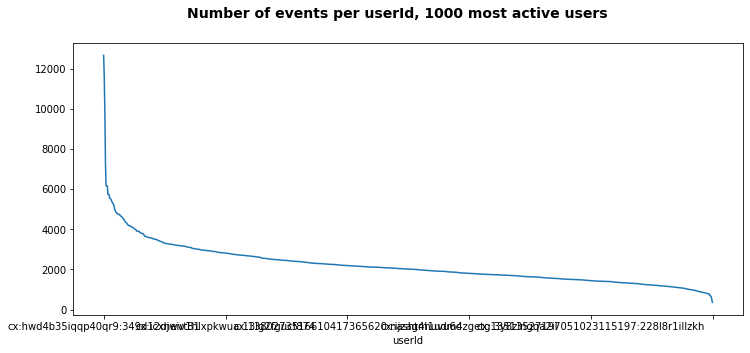

In [40]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Number of events per userId, 1000 most active users', fontsize=14, fontweight='bold')
fig.add_subplot(data.groupby("userId").count()["eventId"].sort_values(ascending=False).plot())